# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('usa_housing_kaggle.csv')
df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.9,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.0,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.0,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.3,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.4,1175,1994,2,0.74,20756,15.66,4


In [6]:
df.describe()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,522761.916667,2.966667,2.464000,3052.75000,1962.616667,1.513333,1.062200,54324.770000,49.324033,5.096667
std,256922.348275,1.451175,0.886184,1194.97144,36.005431,1.116832,0.543896,24718.938552,28.833220,2.674165
min,112666.000000,1.000000,1.000000,840.00000,1902.000000,0.000000,0.110000,10163.000000,0.190000,1.000000
25%,299936.500000,2.000000,1.700000,2053.50000,1931.750000,1.000000,0.570000,34175.000000,22.547500,3.000000
50%,505806.500000,3.000000,2.400000,3127.00000,1961.000000,1.000000,1.085000,54896.500000,49.970000,5.000000
75%,744603.750000,4.000000,3.200000,4081.00000,1994.000000,3.000000,1.482500,74108.000000,74.402500,8.000000
max,999684.000000,5.000000,4.000000,4997.00000,2022.000000,3.000000,2.000000,99881.000000,99.710000,9.000000


# detect the outliers and remove them.

<Axes: xlabel='Price', ylabel='Count'>

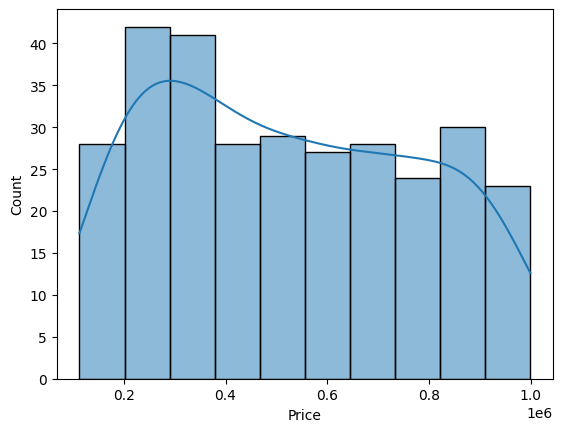

In [7]:

sns.histplot(x = 'Price',data = df,kde = True)

<Axes: ylabel='Price'>

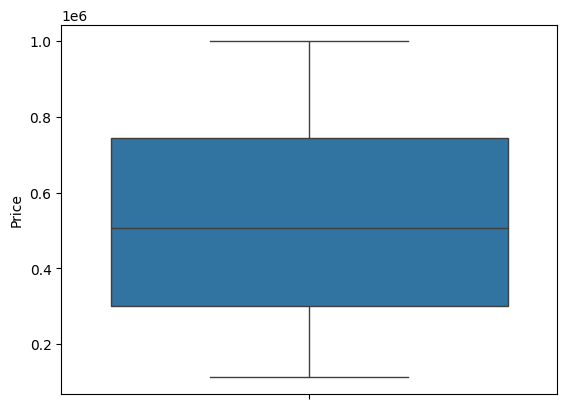

In [8]:
sns.boxplot(df['Price'])

/tmp/ipykernel_244347/265479978.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bedrooms'])


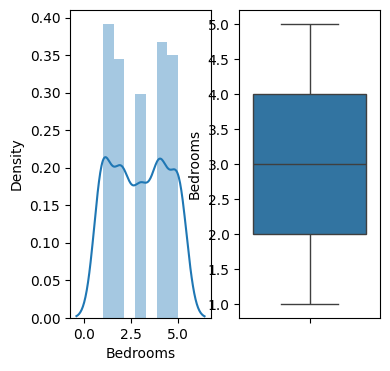

In [9]:
# no.of bedromms
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.distplot(df['Bedrooms'])

plt.subplot(1,2,2)
sns.boxplot(df['Bedrooms'])
plt.show()

#### from the above visualization there is no outliers in the bedroom column and mean is 3 , but the most houses contains 1 or 4 bedrooms

/tmp/ipykernel_244347/1273350105.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SquareFeet'])


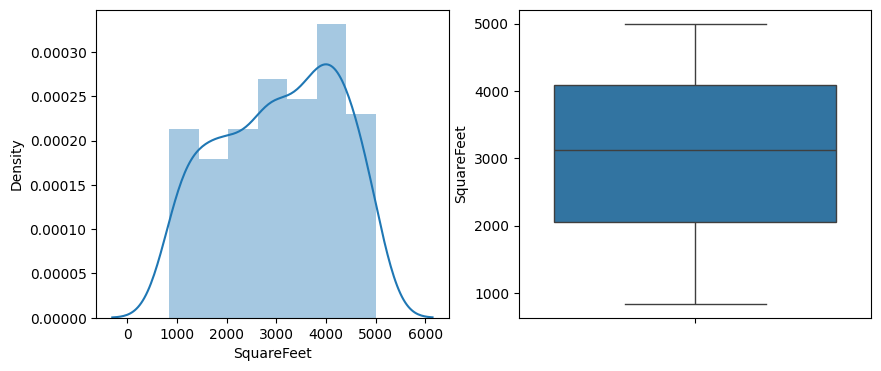

In [10]:
# no.of SquareFeet
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df['SquareFeet'])

plt.subplot(1,2,2)
sns.boxplot(df['SquareFeet'])
plt.show()

#### from the charts we can say the mean of each house sqaure feet is 3000

In [11]:
df.columns

Index(['Price', 'Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt',
       'GarageSpaces', 'LotSize', 'ZipCode', 'CrimeRate', 'SchoolRating'],
      dtype='object')

In [12]:
numeric_df = df.select_dtypes(include = 'number')

In [13]:
numeric_df

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.9,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.0,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.0,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.3,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.4,1175,1994,2,0.74,20756,15.66,4
...,...,...,...,...,...,...,...,...,...,...
295,862002,4,2.8,1129,1944,0,1.80,35227,32.30,3
296,242483,3,2.4,4440,1988,2,0.46,15978,99.71,9
297,758271,2,2.2,4694,1952,2,0.71,97527,97.98,7
298,314835,5,2.0,4907,1941,3,0.53,27153,65.61,8


In [14]:
numeric_df.columns = numeric_df.columns.str.strip()

In [15]:
%matplotlib inline


Plotting columns: ['Price', 'Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', 'GarageSpaces', 'LotSize', 'ZipCode', 'CrimeRate', 'SchoolRating']


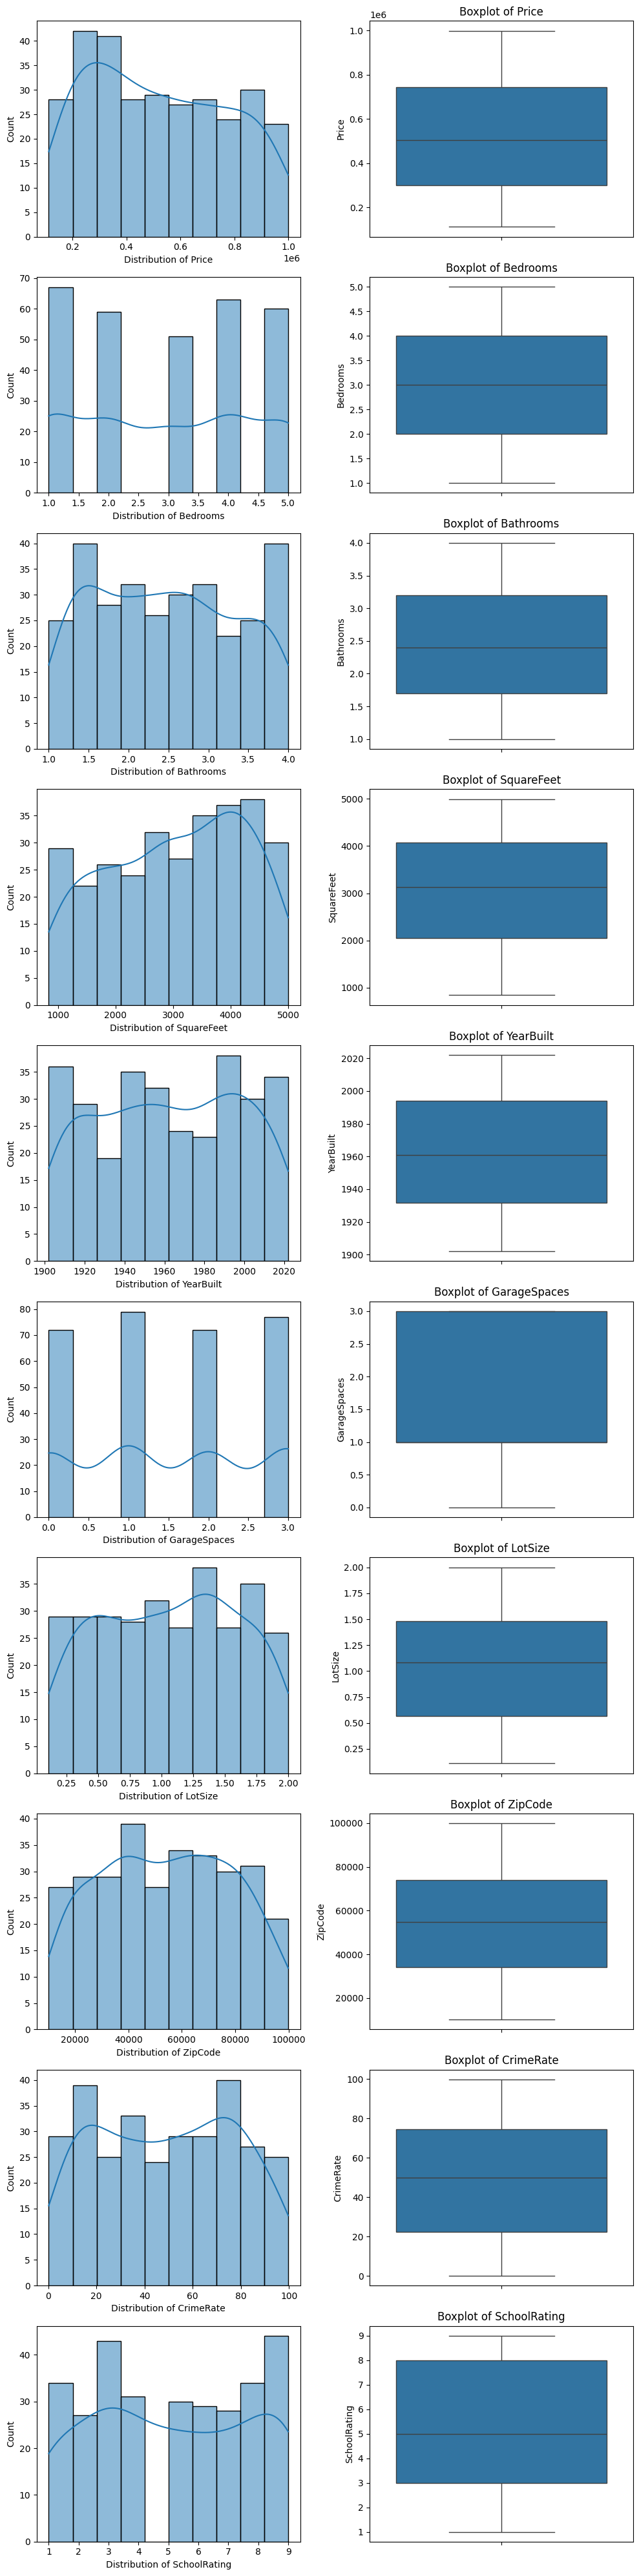

In [18]:
# Remove columns with all NaN or only one unique value
valid_numeric_cols = [col for col in numeric_df if df[col].dropna().nunique() > 1]

print("Plotting columns:", valid_numeric_cols)

if not valid_numeric_cols:
    print("No valid numeric columns to plot.")
else:
    fig, axes = plt.subplots(len(valid_numeric_cols), 2, figsize=(10, 4*len(valid_numeric_cols)))

    for idx, col in enumerate(valid_numeric_cols):
        sns.histplot(df[col], kde=True, ax=axes[idx, 0])
        axes[idx, 0].set_xlabel(f'Distribution of {col}')
        
        sns.boxplot(y=df[col], ax=axes[idx, 1])
        axes[idx, 1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


# Feature Selection

In [19]:
df.isna().sum()

Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64

In [23]:
corr = df.corr()['Price'].sort_values(ascending=False)

/tmp/ipykernel_244347/2876587625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = corr.values, y = corr.index, palette = 'coolwarm',legend = False)


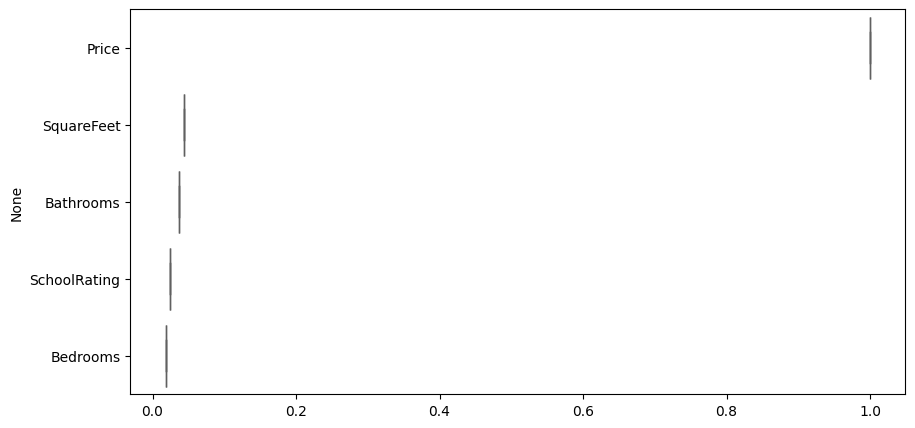

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x = corr.values, y = corr.index, palette = 'coolwarm',legend = False)
plt.show()

In [27]:
# df = df.drop(['CrimeRate','GarageSpaces','YearBuilt','ZipCode','LotSize'],axis = 1)
# df.head()

# feature Scaling

### initialize the scaler

In [28]:
scaler = MinMaxScaler()

# apply scaling
scaled_data = scaler.fit_transform(df)

# convert back it into df
df_scaled  = pd.DataFrame(scaled_data)

df_scaled.head(10)

,0,1,2,3,4
0,0.123213,0.00,0.300000,0.959105,0.500
1,0.742363,0.25,0.333333,0.046909,1.000
2,0.134457,0.00,0.666667,0.464037,0.250
3,0.398157,0.50,0.766667,0.449363,0.000
4,0.277911,0.75,0.800000,0.080587,0.375
5,0.711937,0.00,0.800000,0.839548,1.000
6,0.110034,0.00,0.100000,0.624248,0.375
7,0.811161,0.25,0.500000,0.368054,0.125
8,0.047598,0.25,0.066667,0.606206,0.500
9,0.140551,0.50,0.533333,0.806110,0.250


# splitting df

In [29]:
x = df.drop('Price',axis = 1)

In [30]:
y = df['Price']

In [31]:
x.shape

(300, 4)

In [32]:
y.shape

(300,)

In [37]:


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 44)

In [53]:
X_train

,Bedrooms,Bathrooms,SquareFeet,SchoolRating
44,1,1.4,2835,3
105,1,2.1,3661,6
228,1,1.4,2876,7
145,4,1.6,2559,8
289,5,4.0,4997,7
...,...,...,...,...
96,2,3.8,3856,9
59,3,4.0,3712,5
173,5,1.5,2623,9
241,1,2.1,4852,4


In [54]:
X_test

,Bedrooms,Bathrooms,SquareFeet,SchoolRating
38,5,1.3,4818,5
161,2,3.8,1568,3
288,4,1.2,4349,3
136,3,2.7,3003,3
95,2,2.3,3977,3
20,5,1.2,1865,8
282,1,1.5,2439,9
176,5,1.5,1632,7
168,2,2.9,2281,6
43,5,1.4,2002,2


In [55]:
y_train

44     229981
105    707086
228    435674
145    921654
289    411955
        ...  
96     664685
59     370936
173    872838
241    865313
276    468452
Name: Price, Length: 240, dtype: int64

In [56]:
y_test

38     249503
161    723094
288    978338
136    950937
95     587879
20     421879
282    122671
176    285340
168    222409
43     165725
12     999159
125    236330
291    418394
124    803550
137    728776
28     314176
281    967055
65     517113
297    758271
94     635822
160    314020
33     586232
207    515192
87     371836
280    210078
35     256730
216    227948
114    662332
61     339629
231    693128
179    511357
69     351995
269    283734
7      832180
249    913168
210    910208
107    448951
52     628178
2      231932
36     970910
102    123247
122    233767
30     447449
251    737147
217    679304
46     691723
200    300235
93     723587
54     589492
165    219176
131    229312
9      237337
243    516880
186    264899
148    589570
260    613153
211    785440
51     431236
234    937437
206    508923
Name: Price, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## model training

In [67]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [68]:
# model Testing
y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[24975805.95128292  8548734.52558979 22577455.23459637 15791004.67321151
 20699308.27726784 10080919.45612813 12965649.27743419  8898400.93744362
 12167036.07045049 10718291.77295949 24118594.90183239 21290412.77533764
 12955749.38725669  6658866.22415683 20413063.50391928 15720909.77147629
  9454423.20588383 19268365.63028695 24359638.47457816  5281813.8641006
 15146904.04048847 20067937.45382455 11161659.78015564  9674953.43998313
  4973267.5154835  14773634.85308952 20801508.02479222 25061515.47793479
 21021069.36764834 23913518.36483748  6342986.09102456 14552983.0863905
 18413897.35982332 12572056.97844393 19628551.88321148 11651162.824957
 21947508.07256849 20180170.9799415  14598056.5764859  23312985.42340725
 21690313.9184783  12863505.68983028 18373216.63335749 18219368.7224919
 21262998.76571098 11036301.75256914  7216360.12296313 24245228.19755702
 16483426.23913876  9481955.62519599 25494513.21266025 21792787.84478837
  7952346.23453323 20761133.72054959 16118676.86055913 2

/home/salam-shaik/Desktop/jupyter_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


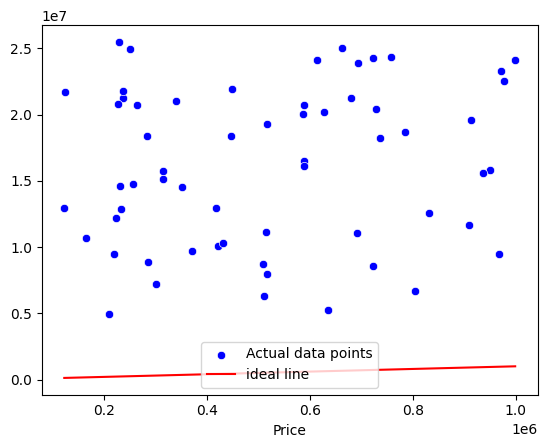

In [69]:
# Draw the graph and check linear line
sns.scatterplot(x = y_test,y = y_pred,color = 'blue',label = 'Actual data points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color = 'red',label = 'ideal line')
plt.legend()
plt.show()

In [70]:
# combine actual and predicted value side by side
results = np.column_stack((y_test,y_pred))

In [71]:
print('Actual Values | Predicted Values' )
print("--------------------------------")

for actual,predicted in results:
    print(f'{actual:14.2f} | {predicted:14.2f}')

Actual Values | Predicted Values
--------------------------------
     249503.00 |    24975805.95
     723094.00 |     8548734.53
     978338.00 |    22577455.23
     950937.00 |    15791004.67
     587879.00 |    20699308.28
     421879.00 |    10080919.46
     122671.00 |    12965649.28
     285340.00 |     8898400.94
     222409.00 |    12167036.07
     165725.00 |    10718291.77
     999159.00 |    24118594.90
     236330.00 |    21290412.78
     418394.00 |    12955749.39
     803550.00 |     6658866.22
     728776.00 |    20413063.50
     314176.00 |    15720909.77
     967055.00 |     9454423.21
     517113.00 |    19268365.63
     758271.00 |    24359638.47
     635822.00 |     5281813.86
     314020.00 |    15146904.04
     586232.00 |    20067937.45
     515192.00 |    11161659.78
     371836.00 |     9674953.44
     210078.00 |     4973267.52
     256730.00 |    14773634.85
     227948.00 |    20801508.02
     662332.00 |    25061515.48
     339629.00 |    21021069.37
     6

# model evalution

In [72]:
mse = mean_squared_error(y_test,y_pred)
np.sqrt(mse)

np.float64(16673433.28913136)